<a href="https://colab.research.google.com/github/hseyeon1006/ESAA_YB/blob/main/BDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


### 데이터 불러오기 및 합치기

In [1]:
#드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#필요 패키지 로드
import warnings
warnings.filterwarnings(action='ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
#그래프 글자 깨짐 방지
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 0s (19.6 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 122545 files and dir

In [3]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

In [4]:
#데이터 불러오기
bunga = pd.read_excel('/content/drive/MyDrive/Colab_Notebooks/공모전/데이터/track1_11번가.xlsx', sheet_name=None)
naver = pd.read_excel('/content/drive/MyDrive/Colab_Notebooks/공모전/데이터/track1_네이버.xls', sheet_name=None)

bunga = pd.concat(bunga, ignore_index=True)
naver = pd.concat(naver, ignore_index=True)

In [5]:
#네이버에만 있는 변수 삭제
naver = naver.drop(columns=['등록일자'],axis=1)

In [6]:
#네이버와 11번가 데이터 합치기
data = pd.merge(naver, bunga, how='outer')

###변수 처리

In [7]:
#필요없는 변수 삭제하기
data.drop(['덤상품수량', '배송유형', '플랜트 정보', '단독배송여부', 'GS홈쇼핑주문번호'], axis=1, inplace=True)

In [8]:
#요일 변수 추가하기
from datetime import datetime

data['주문일'] = data['주문일'].apply(lambda x : datetime.strptime(str(x), "%Y%m%d"))

data['요일'] = data['주문일'].apply(lambda x : x.weekday())

def what_day_is_it(date):
  days = ['월', '화', '수', '목', '금', '토', '일']
  return(days[date])

data['요일'] = data['요일'].apply(lambda x : what_day_is_it(x))

In [9]:
#거래처 변수명 간단하게 바꾸기
data.loc[data['거래처']=='외부몰_직거래_네이버(신)','거래처']='네이버'
data.loc[data['거래처']=='외부몰_직거래_11번가(신)','거래처']='11번가'

In [10]:
#분류한 카테고리 합치기 위한 파일 불러오기
code = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/공모전/데이터/code_final.csv',encoding = 'euc-kr')

In [ ]:
code.head()

,자재명,자재코드,자재명1,대분류,용량,세부분류
0,부침가루1kg,100131,부침가루,요리재료,단품,가루
1,B)중력1등20kg,100952,중력밀가루,요리재료,대용량,가루
2,요리당2.45KG/상온,101070,요리당,조미료,중간용량,조미료
3,B)중력1등10kg,101143,중력밀가루,요리재료,대용량,가루
4,요리당5kg,101450,요리당,조미료,대용량,조미료


In [11]:
#code와 data 합쳐서 data에 저장
data = pd.merge(data, code, how='outer', on='자재코드')

In [ ]:
data.head(3)

,거래처,거래처주문번호,주문일,사은품여부,출고예정일,주문/배송상태,클레임 상태,운송장등록일자,상품순번,상품코드,...,주문수량,취소수량,반품수량,마감구분,요일,자재명_y,자재명1,대분류,용량,세부분류
0,네이버,2022063028753781.0,2022-06-30,N,20220705,배송 완료,-,2022-07-05 10:50:12,11,40053106,...,3,0,0,풀필먼트(저온),목,햇반/쿡반 김치치즈주먹밥 500G/냉동,김치치즈주먹밥,냉동식품,단품,냉동밥
1,네이버,2022063032834301.0,2022-06-30,N,20220705,배송 완료,-,2022-07-05 02:20:30,11,40053106,...,3,0,0,풀필먼트(저온),목,햇반/쿡반 김치치즈주먹밥 500G/냉동,김치치즈주먹밥,냉동식품,단품,냉동밥
2,네이버,2022063021340321.0,2022-06-30,N,20220702,배송 완료,-,2022-07-05 04:50:15,11,40053106,...,3,0,0,풀필먼트(저온),목,햇반/쿡반 김치치즈주먹밥 500G/냉동,김치치즈주먹밥,냉동식품,단품,냉동밥


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 344590 entries, 0 to 344589
Data columns (total 28 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   거래처      344590 non-null  object        
 1   거래처주문번호  344590 non-null  object        
 2   주문일      344590 non-null  datetime64[ns]
 3   사은품여부    344590 non-null  object        
 4   출고예정일    344590 non-null  int64         
 5   주문/배송상태  344590 non-null  object        
 6   클레임 상태   344590 non-null  object        
 7   운송장등록일자  336496 non-null  object        
 8   상품순번     344590 non-null  int64         
 9   상품코드     344590 non-null  object        
 10  상품명      344590 non-null  object        
 11  상품수량     344590 non-null  int64         
 12  상품유형     343921 non-null  object        
 13  상품타입     343921 non-null  object        
 14  매출액      344590 non-null  int64         
 15  자재코드     344590 non-null  int64         
 16  자재명_x    343921 non-null  object        
 17  초기자재수량   3

###가설3 : cj 제일제당 상품의 각 유형별로 주문건수에 차이가 있다

분석방법 : 대분류를 기준으로 value count하고 시각화 / 세분화해서 자재코드 등으로 나눠서 다시 해보기

통합

In [ ]:
data['대분류'].unique()

array(['냉동식품', '조미료', '즉석식품', '반찬류', '가공육', '스팸', '밀키트', '요리재료', '소스/양념',
       '간편식', '간식류', '사은품', '선물세트'], dtype=object)

In [12]:
#대분류 칼럼 고유값의 개수 파악
a = data[['대분류']].groupby('대분류').value_counts()
a = pd.DataFrame(a)
a.rename(columns = {0:'주문수'}, inplace=True)
a

,주문수
대분류,
가공육,993
간식류,2741
간편식,2344
냉동식품,131661
밀키트,11456
반찬류,5576
사은품,669
선물세트,28
소스/양념,41347


냉동식품, 즉석식품의 절대적 개수가 많아서 이런 결과가 나왔을수도 있음

-> 대분류의 종류별 개수로 나눠보기



In [13]:
#대분류의 종류별 개수 확인하기
b = data[['대분류','자재코드']].groupby('대분류').nunique().sort_values('자재코드',ascending=False)
b.rename(columns = {'자재코드':'자재코드수'}, inplace=True)
b

,자재코드수
대분류,
조미료,209
냉동식품,177
즉석식품,148
요리재료,135
소스/양념,89
반찬류,85
간식류,63
밀키트,61
가공육,33


In [14]:
c = a['주문수']/b['자재코드수']
c = pd.DataFrame(c)
c.rename(columns = {0:'비율'}, inplace=True)
c

,비율
대분류,
가공육,30.090909
간식류,43.507937
간편식,146.500000
냉동식품,743.847458
밀키트,187.803279
반찬류,65.600000
사은품,60.818182
선물세트,14.000000
소스/양념,464.573034


즉석식품, 냉동식품의 종류가 많은 것을 감안해도 절대적인 주문량이 많은 편임

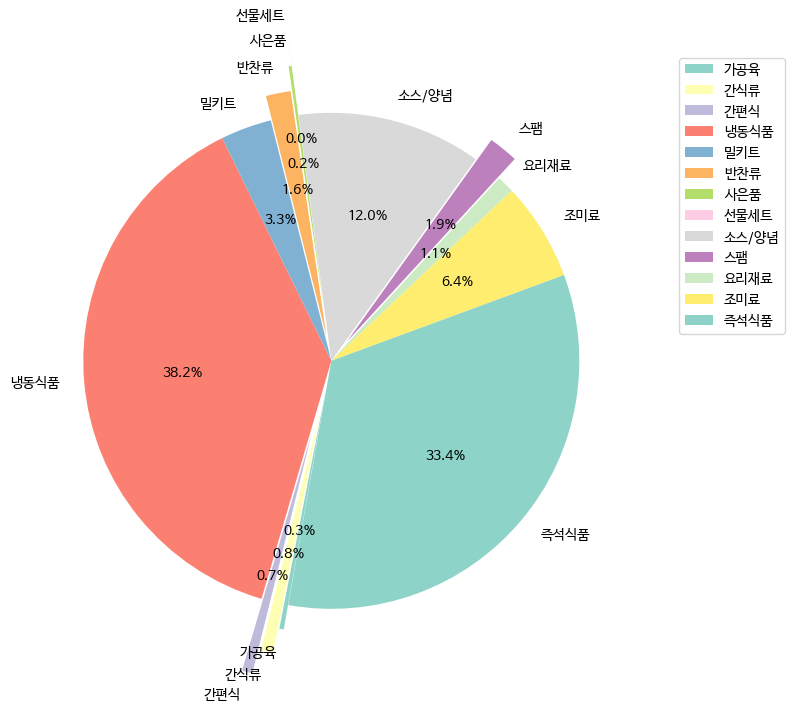

In [ ]:
sns.set_palette('Set3')
data[['대분류']].groupby('대분류').value_counts().plot(kind='pie', autopct='%.1f%%', startangle=260, counterclock=False, explode=[0.1,0.2,0.3,0,0,0.1,0.2,0.3,0,0.1,0,0,0])
plt.legend(bbox_to_anchor=(1.05,1))

네이버

In [15]:
df1 = data[data['거래처']=='네이버']
df1.head()

,거래처,거래처주문번호,주문일,사은품여부,출고예정일,주문/배송상태,클레임 상태,운송장등록일자,상품순번,상품코드,...,주문수량,취소수량,반품수량,마감구분,요일,자재명_y,자재명1,대분류,용량,세부분류
0,네이버,2022063028753781.0,2022-06-30,N,20220705,배송 완료,-,2022-07-05 10:50:12,11,40053106,...,3,0,0,풀필먼트(저온),목,햇반/쿡반 김치치즈주먹밥 500G/냉동,김치치즈주먹밥,냉동식품,단품,냉동밥
1,네이버,2022063032834301.0,2022-06-30,N,20220705,배송 완료,-,2022-07-05 02:20:30,11,40053106,...,3,0,0,풀필먼트(저온),목,햇반/쿡반 김치치즈주먹밥 500G/냉동,김치치즈주먹밥,냉동식품,단품,냉동밥
2,네이버,2022063021340321.0,2022-06-30,N,20220702,배송 완료,-,2022-07-05 04:50:15,11,40053106,...,3,0,0,풀필먼트(저온),목,햇반/쿡반 김치치즈주먹밥 500G/냉동,김치치즈주먹밥,냉동식품,단품,냉동밥
3,네이버,2022063033229841.0,2022-06-30,N,20220702,배송 완료,-,2022-07-05 00:20:28,11,40053106,...,3,0,0,풀필먼트(저온),목,햇반/쿡반 김치치즈주먹밥 500G/냉동,김치치즈주먹밥,냉동식품,단품,냉동밥
4,네이버,2022063033064431.0,2022-06-30,N,20220702,배송 완료,-,2022-07-05 00:10:07,31,40053106,...,3,0,0,풀필먼트(저온),목,햇반/쿡반 김치치즈주먹밥 500G/냉동,김치치즈주먹밥,냉동식품,단품,냉동밥


In [16]:
#대분류 칼럼 고유값의 개수 파악
a1 = df1[['대분류']].groupby('대분류').value_counts()
a1 = pd.DataFrame(a1)
a1.rename(columns = {0:'주문수'}, inplace=True)
a1

,주문수
대분류,
가공육,513
간식류,2075
간편식,1673
냉동식품,40648
밀키트,6011
반찬류,3944
사은품,574
선물세트,27
소스/양념,2275


In [17]:
#대분류의 종류별 개수 확인하기
b1 = df1[['대분류','자재코드']].groupby('대분류').nunique().sort_values('자재코드',ascending=False)
b1.rename(columns = {'자재코드':'자재코드수'}, inplace=True)
b1

,자재코드수
대분류,
조미료,191
냉동식품,170
즉석식품,141
요리재료,110
소스/양념,76
반찬류,70
밀키트,55
간식류,49
가공육,25


In [18]:
c1 = a1['주문수']/b1['자재코드수']
c1 = pd.DataFrame(c1)
c1.rename(columns = {0:'비율'}, inplace=True)
c1

,비율
대분류,
가공육,20.520000
간식류,42.346939
간편식,111.533333
냉동식품,239.105882
밀키트,109.290909
반찬류,56.342857
사은품,57.400000
선물세트,27.000000
소스/양념,29.934211


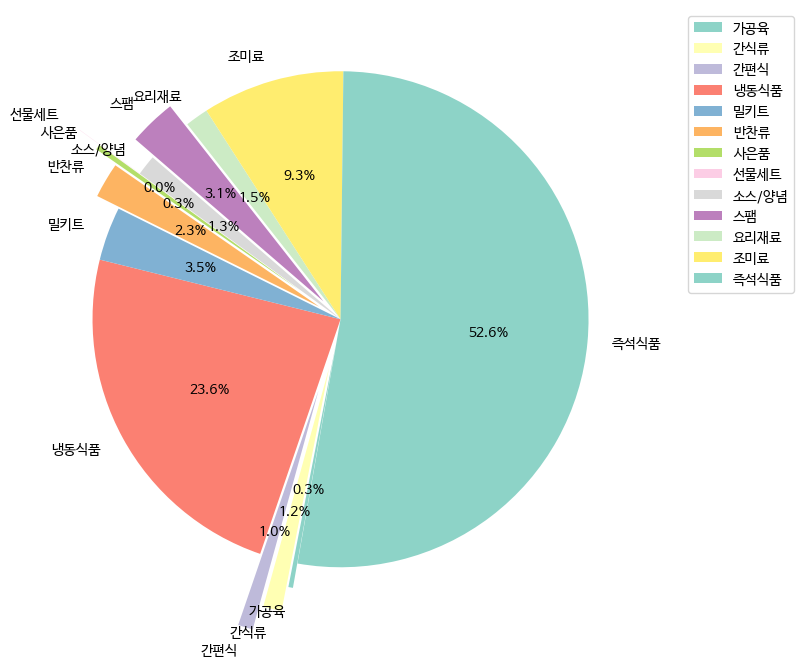

In [ ]:
sns.set_palette('Set3')
df1[['대분류']].groupby('대분류').value_counts().plot(kind='pie', autopct='%.1f%%', startangle=260, counterclock=False, explode=[0.1,0.2,0.3,0,0,0.1,0.2,0.3,0,0.1,0,0,0])
plt.legend(bbox_to_anchor=(1.05,1))

11번가

In [19]:
df2 = data[data['거래처']=='11번가']
df2.head()

,거래처,거래처주문번호,주문일,사은품여부,출고예정일,주문/배송상태,클레임 상태,운송장등록일자,상품순번,상품코드,...,주문수량,취소수량,반품수량,마감구분,요일,자재명_y,자재명1,대분류,용량,세부분류
2093,11번가,20220531450155059,2022-05-31,N,20220602,배송 완료,-,2022-06-01 16:33:05,11,40030513,...,2,0,0,냉동,화,햇반/쿡반 김치치즈주먹밥 500G/냉동,김치치즈주먹밥,냉동식품,단품,냉동밥
2094,11번가,20220531450144780,2022-05-31,N,20220602,배송 완료,-,2022-06-02 15:33:00,32,40015007,...,1,0,0,냉동,화,햇반/쿡반 김치치즈주먹밥 500G/냉동,김치치즈주먹밥,냉동식품,단품,냉동밥
2095,11번가,20220531450117976,2022-05-31,N,20220602,배송 완료,-,2022-06-01 16:33:05,11,40030513,...,2,0,0,냉동,화,햇반/쿡반 김치치즈주먹밥 500G/냉동,김치치즈주먹밥,냉동식품,단품,냉동밥
2096,11번가,20220531450117976,2022-05-31,N,20220602,배송 완료,-,2022-06-01 16:33:05,12,40015007,...,1,0,0,냉동,화,햇반/쿡반 김치치즈주먹밥 500G/냉동,김치치즈주먹밥,냉동식품,단품,냉동밥
2097,11번가,20220531450069822,2022-05-31,N,20220602,배송 완료,-,2022-06-01 16:33:04,13,40015007,...,1,0,0,냉동,화,햇반/쿡반 김치치즈주먹밥 500G/냉동,김치치즈주먹밥,냉동식품,단품,냉동밥


In [20]:
#대분류 칼럼 고유값의 개수 파악
a2 = df2[['대분류']].groupby('대분류').value_counts()
a2 = pd.DataFrame(a2)
a2.rename(columns = {0:'주문수'}, inplace=True)
a2

,주문수
대분류,
가공육,480
간식류,666
간편식,671
냉동식품,91013
밀키트,5445
반찬류,1632
사은품,95
선물세트,1
소스/양념,39072


In [21]:
#대분류의 종류별 개수 확인하기
b2 = df2[['대분류','자재코드']].groupby('대분류').nunique().sort_values('자재코드',ascending=False)
b2.rename(columns = {'자재코드':'자재코드수'}, inplace=True)
b2

,자재코드수
대분류,
조미료,133
즉석식품,115
냉동식품,110
요리재료,88
반찬류,63
소스/양념,58
밀키트,42
간식류,35
가공육,16


In [22]:
c2 = a2['주문수']/b2['자재코드수']
c2 = pd.DataFrame(c2)
c2.rename(columns = {0:'비율'}, inplace=True)
c2

,비율
대분류,
가공육,30.000000
간식류,19.028571
간편식,67.100000
냉동식품,827.390909
밀키트,129.642857
반찬류,25.904762
사은품,95.000000
선물세트,1.000000
소스/양념,673.655172


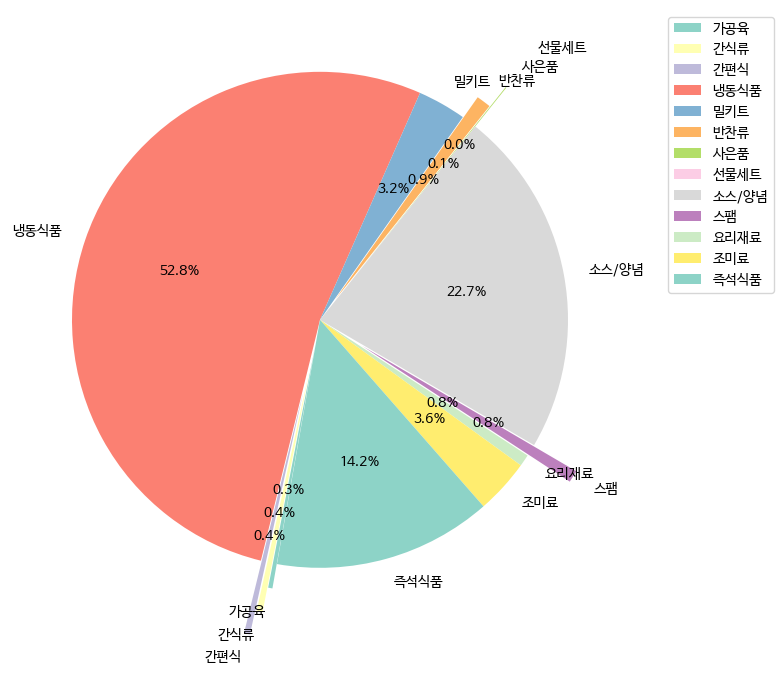

In [ ]:
sns.set_palette('Set3')
df2[['대분류']].groupby('대분류').value_counts().plot(kind='pie', autopct='%.1f%%', startangle=260, counterclock=False, explode=[0.1,0.2,0.3,0,0,0.1,0.2,0.3,0,0.2,0,0,0])
plt.legend(bbox_to_anchor=(1.05,1))

네이버 : 즉석식품의 비율이 절반 이상. 즉석식품->냉동식품->조미료
11번가 : 냉동식품의 비율이 절반 이상. 냉동식품->소스/양념->즉석식품

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, '가공육'),
  Text(1, 0, '간식류'),
  Text(2, 0, '간편식'),
  Text(3, 0, '냉동식품'),
  Text(4, 0, '밀키트'),
  Text(5, 0, '반찬류'),
  Text(6, 0, '사은품'),
  Text(7, 0, '선물세트'),
  Text(8, 0, '소스/양념'),
  Text(9, 0, '스팸'),
  Text(10, 0, '요리재료'),
  Text(11, 0, '조미료'),
  Text(12, 0, '즉석식품')])

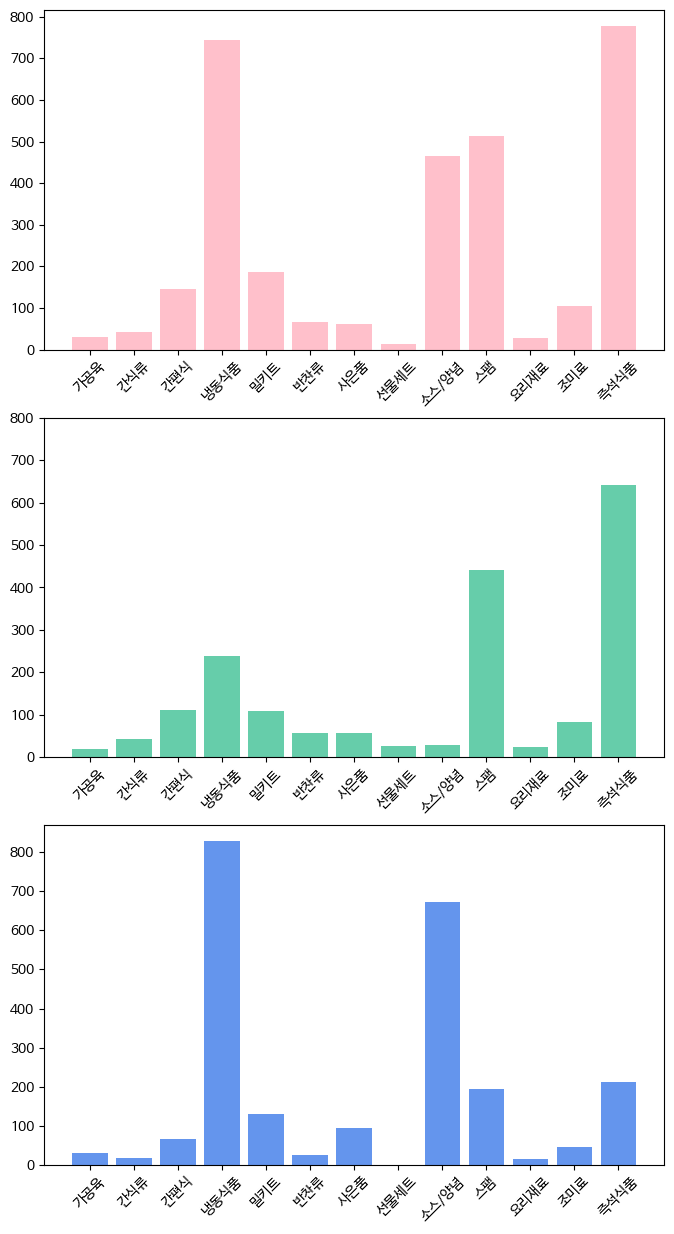

In [23]:
plt.rcParams['figure.figsize'] = [8,15]

plt.subplot(3,1,1)
plt.bar(list(c.index), c['비율'], color='pink')
plt.xticks(rotation=45)

plt.subplot(3,1,2)
plt.bar(list(c1.index), c1['비율'], color='mediumaquamarine')
plt.xticks(rotation=45)
plt.ylim([0,800])

plt.subplot(3,1,3)
plt.bar(list(c2.index), c2['비율'], color = 'cornflowerblue')
plt.xticks(rotation=45)

냉동, 즉석, 소스/양념을 세부 카테고리로 해서 분석해보기

냉동식품

In [25]:
dfn = data[data['대분류']=='냉동식품']
dfn.head(3)

,거래처,거래처주문번호,주문일,사은품여부,출고예정일,주문/배송상태,클레임 상태,운송장등록일자,상품순번,상품코드,...,주문수량,취소수량,반품수량,마감구분,요일,자재명_y,자재명1,대분류,용량,세부분류
0,네이버,2022063028753781.0,2022-06-30,N,20220705,배송 완료,-,2022-07-05 10:50:12,11,40053106,...,3,0,0,풀필먼트(저온),목,햇반/쿡반 김치치즈주먹밥 500G/냉동,김치치즈주먹밥,냉동식품,단품,냉동밥
1,네이버,2022063032834301.0,2022-06-30,N,20220705,배송 완료,-,2022-07-05 02:20:30,11,40053106,...,3,0,0,풀필먼트(저온),목,햇반/쿡반 김치치즈주먹밥 500G/냉동,김치치즈주먹밥,냉동식품,단품,냉동밥
2,네이버,2022063021340321.0,2022-06-30,N,20220702,배송 완료,-,2022-07-05 04:50:15,11,40053106,...,3,0,0,풀필먼트(저온),목,햇반/쿡반 김치치즈주먹밥 500G/냉동,김치치즈주먹밥,냉동식품,단품,냉동밥


In [33]:
dfn[['세부분류']].groupby('세부분류').value_counts()

세부분류
간편식        9
구이류     6491
냉동밥    35077
만두     68475
면류        10
튀김류    18517
피자      3082
dtype: int64

In [35]:
#네이버
dfn1 = dfn[dfn['거래처']=='네이버']

In [36]:
dfn1[['세부분류']].groupby('세부분류').value_counts()

세부분류
간편식        9
구이류     1294
냉동밥    13203
만두     19162
면류         3
튀김류     5791
피자      1186
dtype: int64

In [39]:
#11번가
dfn2 = dfn[dfn['거래처']=='11번가']

In [40]:
dfn2[['세부분류']].groupby('세부분류').value_counts()

세부분류
구이류     5197
냉동밥    21874
만두     49313
면류         7
튀김류    12726
피자      1896
dtype: int64

<Axes: xlabel='세부분류'>

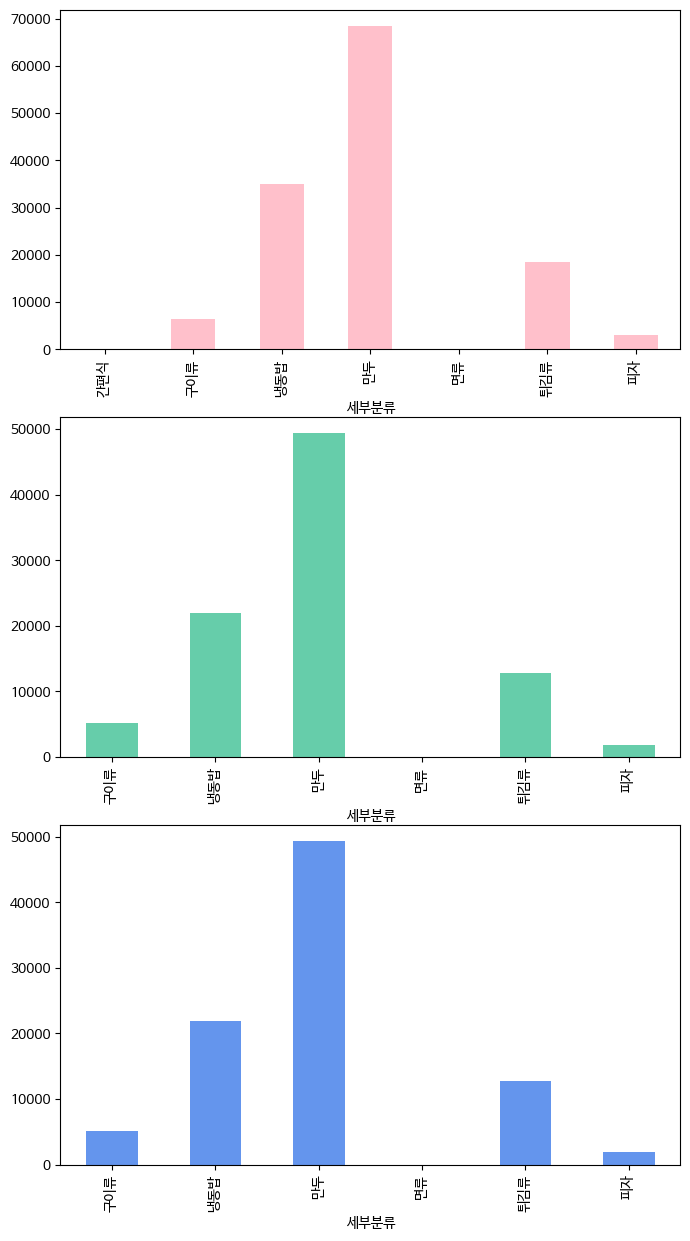

In [42]:
plt.rcParams['figure.figsize'] = [8,15]

plt.subplot(3,1,1)
dfn[['세부분류']].groupby('세부분류').value_counts().plot(kind='bar', color='pink')

plt.subplot(3,1,2)
dfn1[['세부분류']].groupby('세부분류').value_counts().plot(kind='bar', color='mediumaquamarine')

plt.subplot(3,1,3)
dfn2[['세부분류']].groupby('세부분류').value_counts().plot(kind='bar', color='cornflowerblue')

냉동식품끼리는 비슷한 양상 -> 네이버의 총 주문건수가 너무 많아서 그에 비해 냉동식품의 양이 그냥 적은듯? 어느 하나의 양이 줄거나 하는 것 같진 않다

즉석식품

In [26]:
dfj = data[data['대분류']=='즉석식품']
dfj.head(3)

,거래처,거래처주문번호,주문일,사은품여부,출고예정일,주문/배송상태,클레임 상태,운송장등록일자,상품순번,상품코드,...,주문수량,취소수량,반품수량,마감구분,요일,자재명_y,자재명1,대분류,용량,세부분류
16642,네이버,2022063015302151.0,2022-06-30,N,20220705,배송 완료,-,2022-07-04 20:30:25,11,40089269,...,1,0,0,풀필먼트(상온),목,햇반210G*24(1입)/상온,햇반,즉석식품,번들,햇반
16643,네이버,2022063027713851.0,2022-06-30,N,20220704,배송 완료,-,2022-07-03 19:30:01,11,40089269,...,1,0,0,풀필먼트(상온),목,햇반210G*24(1입)/상온,햇반,즉석식품,번들,햇반
16644,네이버,2022063030363171.0,2022-06-30,N,20220702,배송 완료,-,2022-07-03 19:30:03,11,40089269,...,1,0,0,풀필먼트(상온),목,햇반210G*24(1입)/상온,햇반,즉석식품,번들,햇반


In [43]:
dfj[['세부분류']].groupby('세부분류').value_counts()

세부분류
간편식     4586
국      21152
국물류      590
반찬류     6423
솥반     10784
죽       6025
컵반      5422
햇반     60099
dtype: int64

In [44]:
#네이버
dfj1 = dfj[dfj['거래처']=='네이버']

In [45]:
dfj1[['세부분류']].groupby('세부분류').value_counts()

세부분류
간편식     1808
국       9842
국물류      472
반찬류     3505
솥반     10690
죽       1795
컵반      2987
햇반     59441
dtype: int64

In [46]:
#11번가
dfj2 = dfj[dfj['거래처']=='11번가']

In [47]:
dfj2[['세부분류']].groupby('세부분류').value_counts()

세부분류
간편식     2778
국      11310
국물류      118
반찬류     2918
솥반        94
죽       4230
컵반      2435
햇반       658
dtype: int64

<Axes: xlabel='세부분류'>

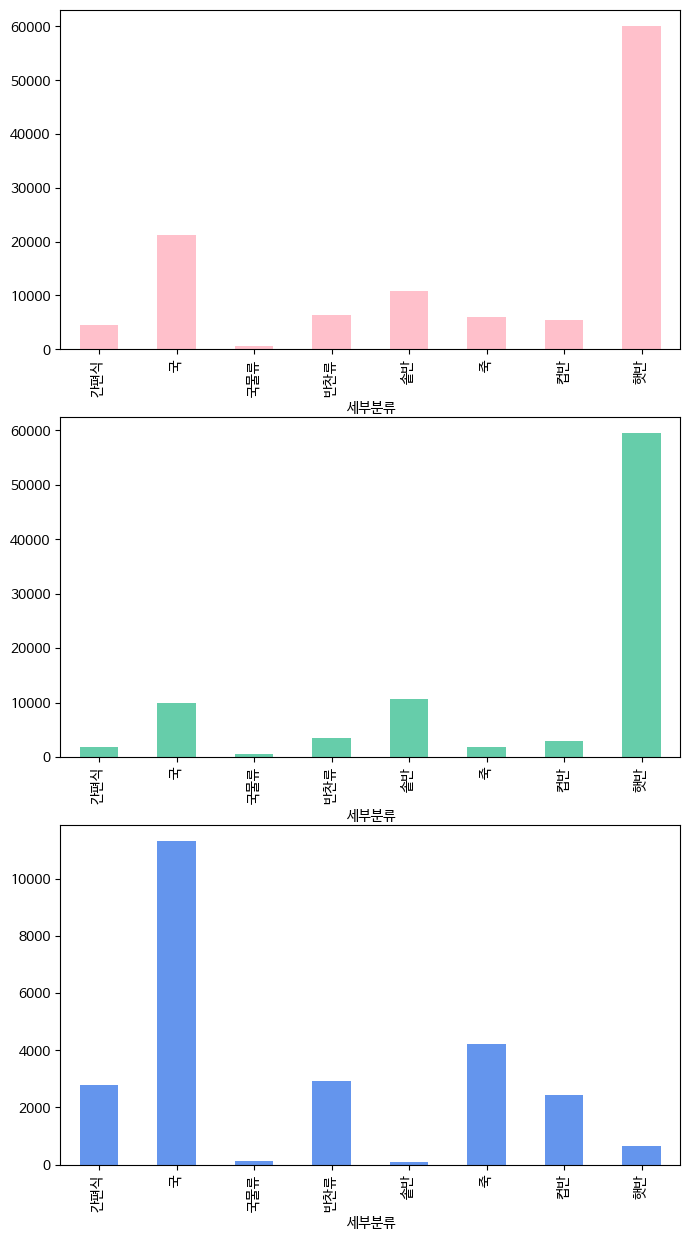

In [48]:
plt.rcParams['figure.figsize'] = [8,15]

plt.subplot(3,1,1)
dfj[['세부분류']].groupby('세부분류').value_counts().plot(kind='bar', color='pink')

plt.subplot(3,1,2)
dfj1[['세부분류']].groupby('세부분류').value_counts().plot(kind='bar', color='mediumaquamarine')

plt.subplot(3,1,3)
dfj2[['세부분류']].groupby('세부분류').value_counts().plot(kind='bar', color='cornflowerblue')

네이버는 햇반이 압도적으로 많고 11번가는 국이 압도적으로 많음

소스/양념

In [27]:
dfs = data[data['대분류']=='소스/양념']
dfs.head(3)

,거래처,거래처주문번호,주문일,사은품여부,출고예정일,주문/배송상태,클레임 상태,운송장등록일자,상품순번,상품코드,...,주문수량,취소수량,반품수량,마감구분,요일,자재명_y,자재명1,대분류,용량,세부분류
44376,네이버,2022063028056041.0,2022-06-30,N,20220710,배송 완료,-,2022-07-08 06:51:02,11,40117852,...,2,0,0,냉장,목,씨제이/시저드레싱235G(12입)/냉장,시저드레싱,소스/양념,번들,소스
44377,네이버,2022063033184421.0,2022-06-30,N,20220703,배송 완료,-,2022-07-03 17:39:00,101,40117852,...,2,0,0,냉장,목,씨제이/시저드레싱235G(12입)/냉장,시저드레싱,소스/양념,번들,소스
44378,네이버,2022063030339691.0,2022-06-30,N,20220703,배송 완료,-,2022-07-01 06:48:10,11,40117852,...,2,0,0,냉장,목,씨제이/시저드레싱235G(12입)/냉장,시저드레싱,소스/양념,번들,소스


In [49]:
dfs[['세부분류']].groupby('세부분류').value_counts()

세부분류
국양념     34725
소스        867
요리양념     5755
dtype: int64

In [50]:
#네이버
dfs1 = dfs[dfs['거래처']=='네이버']

In [51]:
dfs1[['세부분류']].groupby('세부분류').value_counts()

세부분류
국양념     1749
소스       317
요리양념     209
dtype: int64

In [54]:
#11번가
dfs2 = dfs[dfs['거래처']=='11번가']

In [55]:
dfs2[['세부분류']].groupby('세부분류').value_counts()

세부분류
국양념     32976
소스        550
요리양념     5546
dtype: int64

<Axes: xlabel='세부분류'>

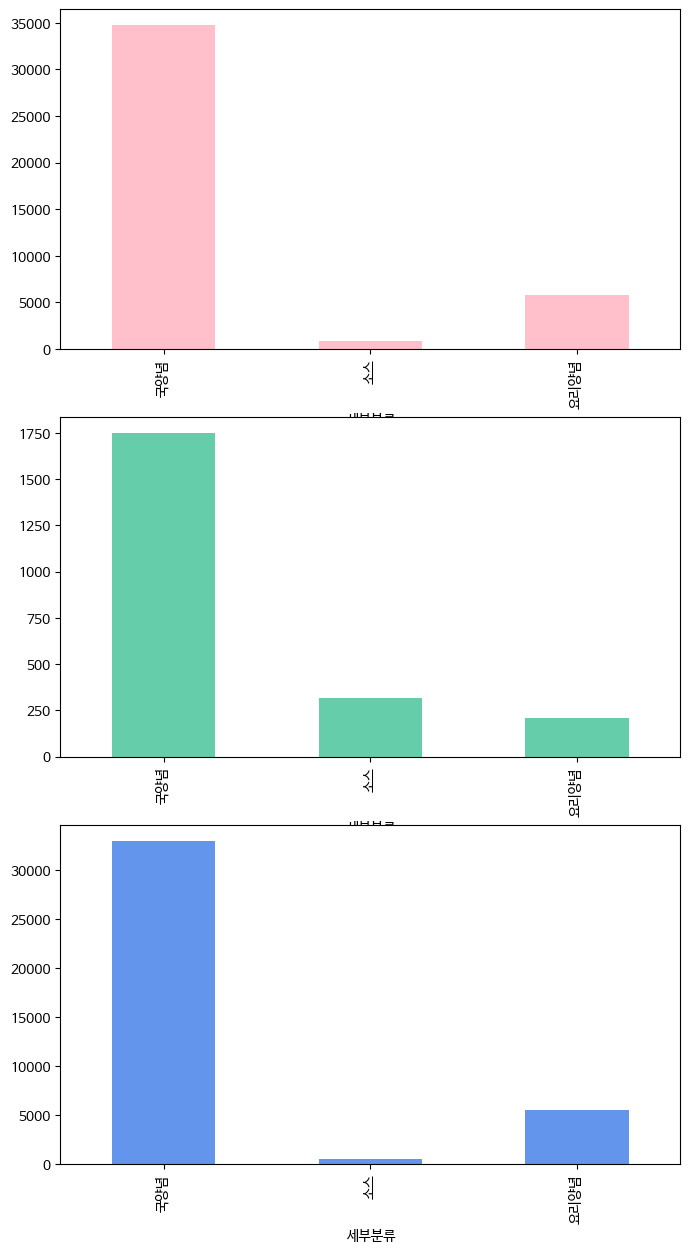

In [57]:
plt.rcParams['figure.figsize'] = [8,15]

plt.subplot(3,1,1)
dfs[['세부분류']].groupby('세부분류').value_counts().plot(kind='bar', color='pink')

plt.subplot(3,1,2)
dfs1[['세부분류']].groupby('세부분류').value_counts().plot(kind='bar', color='mediumaquamarine')

plt.subplot(3,1,3)
dfs2[['세부분류']].groupby('세부분류').value_counts().plot(kind='bar', color='cornflowerblue')

세가지에서 모두 비슷한 양상 -> 단순히 11번가에서 구매하는 고객의 특성이 그런 것 같음 (소스/양념 구매를 많이함)